In [1]:
import json, glob, pycm, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["label"]} ({experiment["concept"]["id"]})'))
    display(Markdown(experiment["concept"]["definition"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='Predict', ylabel='Actual')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["label", "description", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False positives"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["label", "description", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False negatives"))
        display(df_fn_styler)

In [3]:
experiments = [ json.load(open(file, 'r')) for file in glob.glob('caligraph_experiments/*/gpt-4*') ]

In [4]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": f'{pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC:.1%}',
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    } 
    for experiment in experiments ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
2,Player of American football from Alabama,1.000000,High,100.0%,0,0,40
0,Newspaper in New South Wales,0.850000,High,92.5%,2,1,40
4,PlayStation VR game,0.800000,High,90.0%,0,4,40
5,England under-21 international footballer,0.800000,High,90.0%,0,4,40
6,Autobiography,0.750000,Tentative,87.5%,0,5,40
1,Romania international rugby union player,0.350000,Low,67.5%,12,1,40
3,"Member of the European Parliament, 1989–1994",-0.066176,Low,65.5%,9,1,29


## Player of American football from Alabama (http://caligraph.org/ontology/Player_of_American_football_from_Alabama)

Player of American Football from Alabama:

(noun) An individual who actively participates in the sport of American football and is either a resident of the U.S. state of Alabama, was born in Alabama, or is affiliated with Alabama through education or professional sports. This can include high school, college (such as University of Alabama or Auburn University), or professional players (in the National Football League) who have a significant connection to Alabama. These players have knowledge of and engage in the rules and regulations of American football and have developed skills necessary for the sport such as passing, catching, tackling, and strategic playmaking.

### Confusion matrix

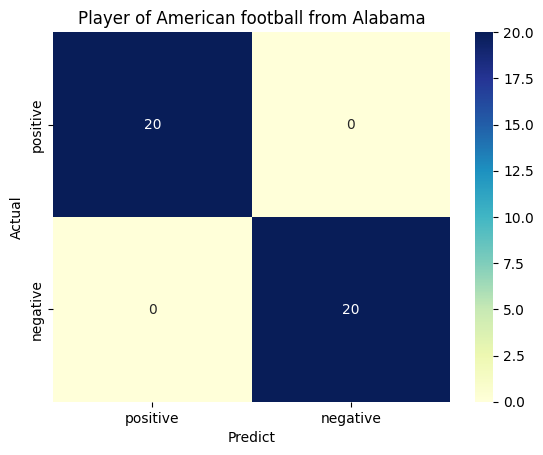

## Newspaper in New South Wales (http://caligraph.org/ontology/Newspaper_in_New_South_Wales)

Newspaper in New South Wales

Noun

A printed or digital publication that is periodically released, often daily or weekly, in the state of New South Wales, Australia. This publication contains a variety of content including news, features, opinions, and advertisements, primarily focusing on events and issues within New South Wales, but also covering national and international news. Examples include The Sydney Morning Herald, The Daily Telegraph, and The Australian.

### Confusion matrix

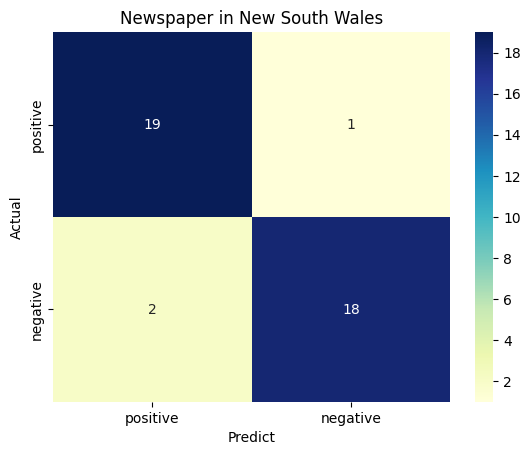

### False positives

label,description,rationale
Parramatta Advertiser,"The Parramatta Advertiser is a named individual and a newspaper published in Sydney, Australia. It is also known as dbr:Parramatta_Advertiser and has a preferred label of ""Parramatta Advertiser"". The format of the newspaper is tabloid and it is available both online and offline. The Parramatta Advertiser was founded on July 15, 1933 and its headquarters are located in Parramatta, Sydney, New South Wales, Australia. The newspaper is owned by NewsLocal and is categorized as a weekly newspaper. The Parramatta Advertiser was derived from the category Newspapers published in Sydney and from NewsLocal.","The Parramatta Advertiser fits the definition of a Newspaper in New South Wales as it is a publication that is periodically released, specifically on a weekly basis. It is published in the state of New South Wales, Australia, specifically in Parramatta, Sydney. The Parramatta Advertiser contains a variety of content, as is typical of newspapers, and is available in both printed and digital formats. Furthermore, it is a part of the category Newspapers published in Sydney, which is within New South Wales. Therefore, based on the provided definition and information, the Parramatta Advertiser can be classified as a Newspaper in New South Wales."
The Free Thought,"""The Free Thought"" is a Ukrainian-language newspaper that was first published in 1949 in Sydney, Australia. It is a non-English language publication established by a Ukrainian publisher and is considered a significant establishment of 1949 in Australia. The newspaper's circulation is reported at 1,500 copies and it follows the ISO 216 format. The newspaper, also known as ""Vil'na dumka"" or ""Vil`na Dumka,"" was founded on July 10, 1949, and its headquarters are located in Lidcombe, New South Wales, Australia. Apart from Ukrainian, the newspaper also features content in English.","""The Free Thought"" fits the definition of a Newspaper in New South Wales as it is a periodically released publication, specifically in a Ukrainian language, that was first published in Sydney, Australia, which is located in New South Wales. The newspaper's headquarters are also located in New South Wales, specifically in Lidcombe. While the content language is primarily Ukrainian, it also features content in English, indicating a variety of content. Although the definition does not specify the language of the newspaper, it does not exclude non-English publications. Therefore, based on the provided definition and information about ""The Free Thought,"" it can be argued that ""The Free Thought"" is a Newspaper in New South Wales."


### False negatives

label,description,rationale
Dubbo,"Dubbo is a city in Australia, specifically in New South Wales. It is characterized as a town or city in Australia, a college town, a town in the Central West of New South Wales, and a country rugby league club in New South Wales. The city has a population of 43,516. Notably, it is also the birthplace of numerous individuals including Tony Lawler, Pat Crawford, David Peachey, Luke Quigley, and many others. It is also the location of numerous entities, such as the Macquarie River railway bridge, the Milestone Hotel, and the Apex Oval. Several organizations, including the Daily Liberal and Air Link, have their headquarters in Dubbo. The city is also known for its Royal Australian Air Force installation and for being a place in New South Wales.","Based on the provided definitions, it is not possible to argue that Dubbo is a Newspaper in New South Wales. Dubbo is described as a city in New South Wales, Australia, not a printed or digital publication that is periodically released. While it is mentioned that the Daily Liberal, a newspaper, has its headquarters in Dubbo, this does not make the city itself a newspaper. Therefore, according to the given definitions, Dubbo cannot be classified as a Newspaper in New South Wales."


## PlayStation VR game (http://caligraph.org/ontology/PlayStation_VR_game)

PlayStation VR game (noun):

A type of interactive digital entertainment or simulation that is specifically designed to be played on the PlayStation VR system, a virtual reality headset produced by Sony Interactive Entertainment. These games utilize VR technology to create immersive, 360-degree experiences, often requiring the player to use motion controls or a standard PlayStation controller to interact with the virtual environment.

### Confusion matrix

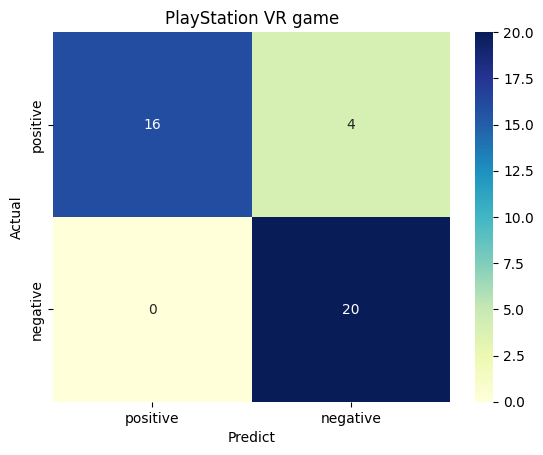

### False negatives

label,description,rationale
The Persistence,"""The Persistence"" is a video game about cloning developed in the United Kingdom. It is a survival horror game set in the 2050s and in outer space. The game falls into the genre of action, roguelike, and survival horror. It uses Unreal Engine and was developed and published by Firesprite. The Persistence is available on multiple platforms including Microsoft Windows, PlayStation 4, PlayStation 5, Xbox Series X and Series S. The game was first released on July 24, 2018, with subsequent releases on May 21, 2020, and June 4, 2021. It is also included in several lists of games on Wikipedia, such as video games developed in the United Kingdom, video games set in the 2050s, and PlayStation 5 games.","The provided description of ""The Persistence"" does not include any information that directly indicates it is a PlayStation VR game. While it is mentioned that the game is available on PlayStation 4 and PlayStation 5, there is no mention of it being designed for or compatible with the PlayStation VR system. Therefore, based on the given definition and the information provided, there is no basis to assert that ""The Persistence"" is a PlayStation VR game."
Doom (1993 video game),"""Doom"" is a 1993 video game developed by id Software. It is a first-person shooter genre video game that has alternative versions and has been commercially released with DOSBox. The game has scored by Bobby Prince and has been published by both Atari, Inc. and id Software. The game was initially released on platforms such as the IOS, PlayStation 3, MS-DOS, Android, Linux, Xbox One, and many others. The game was also part of the Doom franchise series. Doom was not only a popular game but also considered an Internet phenomenon, becoming one of the most-played video games. The game set on Mars and in hell has a science fantasy theme and features demons. Doom also offered a multiplayer online game option and a level editor. The game is notable for its controversies and is known for being a censored video game. Despite this, it is considered artistic. Doom was released on many different dates, with the earliest release date being in 1993.","The provided description of Doom (1993 video game) does not include any information that would suggest it is a PlayStation VR game. The game was released on various platforms, including PlayStation 3, but there is no mention of it being specifically designed for or released on the PlayStation VR system. Therefore, based on the given information, it is not possible to argue that Doom (1993 video game) is a PlayStation VR game."
Eve Online,"Eve Online is a cross-platform video game developed by CCP Games and introduced in 2003. It is a space-based massively multiplayer online role-playing game (MMORPG) that supports cross-platform play and features a virtual economy. The game is also considered a space trading and combat simulator and a space flight simulation game, with elements of vehicular combat. Eve Online has been released on various platforms, including Windows and MacOS, and has been developed using Python software. The game is known for its science fiction universe, dystopian themes, and erotic elements. It has been published by THQ, Atari, and Simon & Schuster and is recognized for its expansion packs and being a business simulation video game. The game is also notable for its inclusion in the Museum of Modern Art's collection.","Based on the provided information, it cannot be argued that Eve Online is a PlayStation VR game. The description of Eve Online does not mention it being designed for or compatible with the PlayStation VR system. It is a cross-platform game that has been released on various platforms, including Windows and MacOS, but there is no mention of PlayStation VR. Therefore, using only the provided information, it cannot be asserted that Eve Online is a PlayStation VR game."
Power Eleven,"Power Eleven is a PlayStation VR game, and a multiplayer and single-pla

## England under-21 international footballer (http://caligraph.org/ontology/England_under-21_international_footballer)

"England Under-21 International Footballer" (noun):

1. A footballer who is officially selected and participates in football matches for England's national under-21 team. The age restriction implies the player is at most 21 years old, although they can still play if they turn 22 during the two-year European Championship campaign.
   
2. Typically, these players are recognized as having significant potential in the sport, and may either be emerging talents in the early stages of their professional careers or established players within the football leagues.

3. The selection of these players is based on their skill, performance, and adherence to the rules and regulations set by the Football Association, the governing body of football in England. 

4. Their primary objective is to represent England in international under-21 football competitions, such as the UEFA European Under-21 Championship. 

5. Being an England under-21 international footballer often serves as a stepping stone to being selected for England's senior national team.

### Confusion matrix

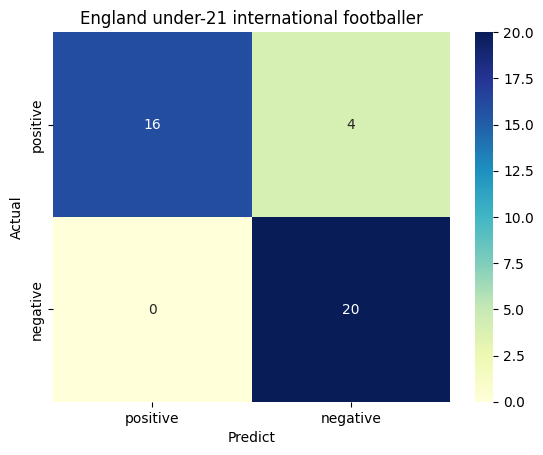

### False negatives

label,description,rationale
Patrick Bamford,"Patrick Bamford is a professional footballer born in September 5, 1993 in Grantham, Lincolnshire, England. He attended Nottingham High School and competes as a forward. Throughout his career, Bamford has played for multiple clubs including Nottingham Forest F.C., Norwich City F.C., Leeds United F.C., Milton Keynes Dons F.C., Derby County F.C., Middlesbrough F.C., Chelsea F.C., Burnley F.C., and Crystal Palace F.C. Notably, he has competed for both England's and Republic of Ireland's national under-19 football teams. Bamford is of Irish descent and has been recognized as a top Premier League goal scorer. He has also been awarded the number 9 jersey in his team lineups. In addition to his athletic achievements, Bamford is a recipient of Nike sponsorship.","The text does not provide sufficient information to assert that Patrick Bamford is an England under-21 international footballer. While it is mentioned that he has competed for England's national under-19 football team, there is no specific mention of him playing for the under-21 team. Therefore, based solely on the provided information, we cannot definitively categorize Patrick Bamford as an England under-21 international footballer."
Paul Gascoigne,"Paul Gascoigne (also known as ""Gazza"") is an English former professional footballer and football manager, born on May 27, 1967, in Gateshead, Tyne and Wear. He is best known for his time with clubs like Tottenham Hotspur F.C., Everton F.C., Newcastle United F.C., S.S. Lazio and Rangers F.C. Internationally, Gascoigne played for the England national football team and was a participant in the 1990 FIFA World Cup. Gascoigne also had a stint as a manager for Kettering Town F.C. and has been involved in various controversies, leading to his conviction for several crimes. He has been diagnosed with bipolar disorder and obsessive-compulsive disorder, and has been a victim of the News International phone-hacking scandal. Gascoigne has also authored autobiographical works, and has been featured in films like ""Bobby Robson: More Than a Manager"", ""Gascoigne"", and ""One Night in Turin"". His spouse is Sheryl Gascoigne and he is related to Regan Gascoigne.","The provided description does not provide sufficient information to argue that Paul Gascoigne is an England under-21 international footballer. While it is stated that Gascoigne played for the England national football team and participated in the 1990 FIFA World Cup, there is no specific mention of him playing for England's under-21 team. Therefore, based solely on the provided information, it cannot be asserted that Paul Gascoigne is an England under-21 international footballer."
"Gary Mills (footballer, born 1961)","Gary Mills (born November 11, 1961 in Northampton) is a former professional English footballer and current football manager. Mills had a versatile playing career, taking on the roles of both a defender and a midfielder. He played for several English teams, including Derby County F.C., Leicester City F.C., Notts County F.C., and Tamworth F.C. Mills also had a stint as an expatriate soccer player in the United States with the Seattle Sounders. His managerial career was equally diverse, with tenures at clubs such as Notts County F.C., Gateshead F.C., and York City F.C. In addition to his football career, Mills is also recognized as an English autobiographer.","The provided description of Gary Mills (footballer, born 1961) does not contain any information that would allow us to assert that he was an England under-21 international footballer. The description mentions that he was a professional English footballer and played for several English teams, but it does not specify whether he was ever selected for and participated in matches for England's national under-21 team. Therefore, based solely on the provided information, we cannot argue that Gary Mills was an England under-21 international footballer."
Ashley Cole,"Ashley Cole is

## Autobiography (http://caligraph.org/ontology/Autobiography)

Autobiography (noun):

1. A literary work about the author's own life, written by the author himself or herself. It is a self-narrated account of one's life experiences, achievements, failures, personal insights, and significant events.

2. Unlike a biography, which is a third-person narrative about someone's life, an autobiography is written from a first-person perspective, providing a subjective and intimate depiction of the author's life.

3. Autobiographies typically cover a significant portion of the author's life, although some may focus on specific themes or periods. They often include details about the author's background, personal life, career, relationships, and thoughts.

4. The truthfulness of an autobiography can be subjective, as it relies on the author's memory and personal interpretation of events.

### Confusion matrix

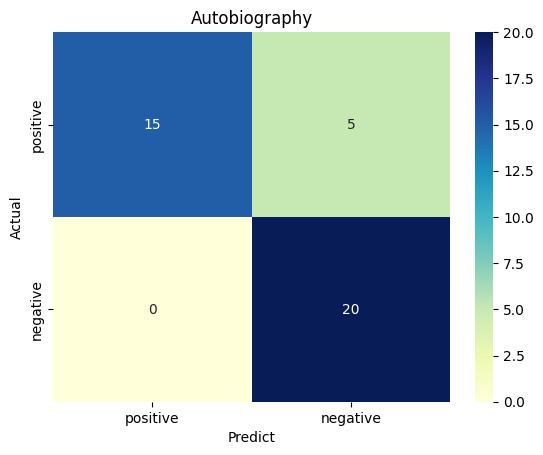

### False negatives

label,description,rationale
"Do You Want to Go With Me?"" (Willst du mit mir gehn","""Do You Want to Go With Me?"" (German: ""Willst du mit mir gehn"") is a named individual, identified within the realm of autobiographies. The title is recognized and preferred as ""Do You Want to Go With Me?\"" (Willst du mit mir gehn"". The piece is derived from a list of autobiographies featured in Wikipedia.","Based on the provided definition of an autobiography, ""Do You Want to Go With Me?"" (Willst du mit mir gehn) can be considered an autobiography if it is a literary work written by the author about their own life. This work would need to be a self-narrated account of the author's life experiences, achievements, failures, personal insights, and significant events. It would be written from a first-person perspective, providing a subjective and intimate depiction of the author's life. The work would typically cover a significant portion of the author's life, although it may focus on specific themes or periods. It would include details about the author's background, personal life, career, relationships, and thoughts. The truthfulness of this work would be subjective, as it relies on the author's memory and personal interpretation of events."
And the Beat Goes On (The Whispers song),"""And the Beat Goes On"" is a song by The Whispers, released as a single in 1979 under the label SOLAR Records. The song is a part of the album 'The Whispers'. It falls under the genres of Dance-pop, Rhythm and blues, Post-disco, and Dance music. The song was written by Leon Sylvers III and produced by Dick Griffey and The Whispers. It has a runtime of 450.0 and 270.0 seconds. The song achieved significant success, becoming a UK top-ten single in 1980. It has alternative labels such as ""And The Beat Goes On"". The song is derived from various sources including 'The Whispers' and 'The Whispers (album)'. The song that preceded ""And the Beat Goes On"" in The Whispers' discography is ""Rock Steady"".","Based on the provided definition and information, there is no evidence to support the assertion that ""And the Beat Goes On"" by The Whispers is an autobiography. The song is a creative work, but it does not fit the definition of an autobiography as it is not a self-narrated account of the author's life experiences, achievements, failures, personal insights, and significant events. It is not written from a first-person perspective about the author's life, nor does it cover a significant portion of the author's life or focus on specific themes or periods in their life. Therefore, ""And the Beat Goes On"" cannot be classified as an autobiography."
Anna Sui (2009 book),"""Anna Sui (2009 book)"" is a non-fiction, autobiographical book authored by Susan Muaddi Darraj. The book, categorized under the genres of Biography and Non-fiction, specifically explores the subject of fashion design. Published by Infobase Publishing, the book has a total of 120 pages and comes in a paperback format. The book carries the ISBN number 9781438128641. The book is derived from various sources, mainly encompassing books by publishing companies from different countries and books by various topics, types, genres, and writers.","Based on the provided definition and information, it is not possible to argue that ""Anna Sui (2009 book)"" is an autobiography. The definition of an autobiography states that it is a literary work about the author's own life, written by the author himself or herself. However, ""Anna Sui (2009 book)"" is authored by Susan Muaddi Darraj, not Anna Sui. Therefore, it does not meet the criteria of an autobiography as defined above."
Nine Lives (2005 film),"""Nine Lives"" is a 2005 English-language film directed by Rodrigo García. This American anthology film is a drama that takes place within a single day and features a large cast, including Ian McShane, Sissy Spacek, K Callan, Mary Kay Place, Elpidia Carrillo, Miguel Sandoval, Glenn Close, Joe Mantegna, Dakota Fanning, 

## Romania international rugby union player (http://caligraph.org/ontology/Romania_international_rugby_union_player)

"Romania international rugby union player" refers to a rugby union athlete who is recognized by the Romanian Rugby Federation as qualified to represent Romania in international rugby union matches and tournaments. This individual typically possesses a high level of skill and expertise in the sport, having met the selection criteria set forth by the governing body. Furthermore, they must either be of Romanian origin or have fulfilled the necessary residency requirements.

### Confusion matrix

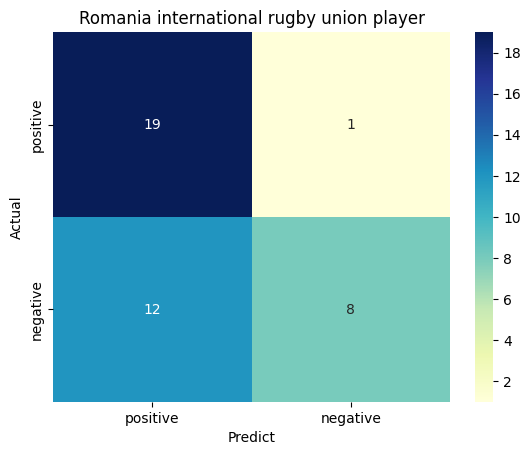

### False positives

label,description,rationale
Iosif Nemes,"Iosif Nemes was a Romanian rugby union player who competed in the 1924 Summer Olympics. He was a part of the Romanian team which won the bronze medal in the rugby union tournament. Born in 1903, Nemes's achievements are recognized in various categories including being an Olympic bronze medalist for Romania, a medalist at the 1924 Summer Olympics, and an Olympic rugby union player of Romania.","Iosif Nemes fits the definition of a ""Romania international rugby union player"" as he was a rugby union athlete who represented Romania in international rugby union matches and tournaments, specifically the 1924 Summer Olympics. His participation in this international event and his achievement of winning a bronze medal demonstrate a high level of skill and expertise in the sport, which aligns with the selection criteria set forth by the Romanian Rugby Federation. Furthermore, his recognition as an Olympic rugby union player for Romania indicates that he was officially recognized by the governing body. Therefore, based on the provided definition, Iosif Nemes can be classified as a Romania international rugby union player."
Gheorghe Gajion,"Gheorghe Gajion is a Moldovan and Romanian international rugby union player born in 1992. He primarily plays as a rugby union prop. Gajion has played for several teams throughout his career, including the Ospreys in the Pro14 league, Rugby Rovigo Delta, and Stade Aurillacois Cantal Auvergne. He has also been part of multiple Pro14 transfers in the 2018-2019, 2020-2021, and 2022-2023 seasons. Standing at 1.9 meters tall and weighing 133 kilograms, Gajion is a notable figure in the rugby world.","Gheorghe Gajion fits the definition of a Romania international rugby union player as he is a recognized rugby union athlete who has represented Romania in international matches. This is evident from the description stating that he is a ""Romanian international rugby union player"". His high level of skill and expertise in the sport is demonstrated by his participation in several teams such as the Ospreys in the Pro14 league, Rugby Rovigo Delta, and Stade Aurillacois Cantal Auvergne. Furthermore, he has been involved in multiple Pro14 transfers, indicating that he meets the selection criteria set by the governing body. Although his nationality is also Moldovan, the description does not negate his Romanian origin or fulfillment of residency requirements, thus he qualifies as a Romania international rugby union player."
Teodor Marian,"Teodor Marian is a named individual and a notable figure in the history of rugby union. He was born in 1904 and is recognized for his achievements in the 1924 Summer Olympics. As a Romanian rugby union player, he represented Romania in the Olympic games, where he notably won a bronze medal. His career and contributions have placed him in several categories, including being an Olympic rugby union player of Romania, a medalist at the 1924 Summer Olympics, and a rugby union player at the 1924 Summer Olympics. He is also acknowledged as an Olympic bronze medalist for Romania. His life and career are derived from historical records such as those detailing rugby union players at the 1924 Summer Olympics, 1904 births, Olympic rugby union players of Romania, medalists at the 1924 Summer Olympics, Romanian rugby union players, and Olympic bronze medalists for Romania.","Teodor Marian is a Romania international rugby union player based on the provided definition and information about him. The definition states that a Romania international rugby union player is an athlete who is recognized by the Romanian Rugby Federation as qualified to represent Romania in international rugby union matches and tournaments. Teodor Marian is noted to have represented Romania in the 1924 Summer Olympics, an international tournament, as a rugby union player. This implies that he was recognized by the Romanian Rugby Federation as qualified to do so. Furthermore, he is of Ro

### False negatives

label,description,rationale
Piti (footballer),"Piti (born 26 May 1981) is a Spanish footballer from Reus, Catalonia, who has played as a midfielder and forward for a number of teams including Real Zaragoza, Hércules CF, PAS Lamia 1964, Jamshedpur FC, CF Reus Deportiu, Ciudad de Murcia, AEL Limassol, Granada CF, Rayo Vallecano and Novelda CF. His career has seen him participate in both the Segunda División and La Liga in Spain, as well as the Super League Greece and the Cypriot First Division. Piti has also been a part of the Catalonia national football team. Throughout his career, Piti has been involved in several transfer seasons, including in the summer of 2013 and winter of 2016-17. He has lived and played football in various countries, including India, Greece, and Cyprus, making him a notable Spanish expatriate sportsperson. His height is 1.74 meters.","There is no information provided in the description of Piti (footballer) that would suggest he is a Romania international rugby union player. The description does not mention any involvement in rugby, let alone at an international level for Romania. Instead, it details his career as a professional footballer in various countries. Therefore, based on the provided information, it is not possible to argue that Piti (footballer) is a Romania international rugby union player."


## Member of the European Parliament, 1989–1994 (http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994)

"Member of the European Parliament, 1989–1994" refers to an individual who served as an elected representative in the European Parliament, the legislative body of the European Union, during the term that ran from 1989 to 1994. This representative would have been responsible for making decisions on EU-wide legislation, budget and treaties during this five-year term. Their membership would have required winning an election in one of the member countries of the European Union.

### Confusion matrix

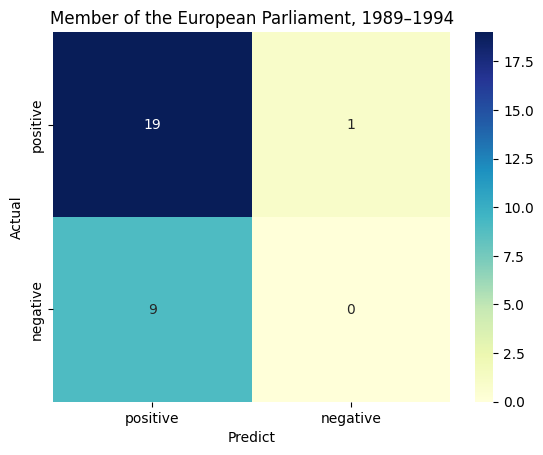

### False positives

label,description,rationale
Dick Ukeiwé,"Dick Ukeiwé was a Black French politician and a prominent figure in New Caledonia's political landscape. Born in 1928 in the Loyalty Islands Province of New Caledonia, Ukeiwé held significant roles such as a Senator of New Caledonia, the President of the Congress of New Caledonia, and a Member of the European Parliament for France from 1989 to 1994. He is also recognized as a Kanak person, an indigenous ethnic group of New Caledonia. Ukeiwé passed away in 2013.","The assertion that Dick Ukeiwé is a Member of the European Parliament, 1989–1994 can be supported by the information provided in the entity description. According to the description, Ukeiwé served as a Member of the European Parliament for France from 1989 to 1994. This aligns with the definition of a Member of the European Parliament, 1989–1994, which states that such an individual would have served as an elected representative in the European Parliament during the term that ran from 1989 to 1994. Therefore, based on the information provided, it can be argued that Dick Ukeiwé fits the definition of a Member of the European Parliament, 1989–1994."
Luigi Colani,"Luigi Colani, born as Lutz Colani on August 2, 1928, in Berlin, was a notable German person of Swiss descent, known for his multi-faceted career. He was an artist from Berlin, a Formula One designer, a German automobile designer, an aircraft designer, and an engineer. Colani also served as a Member of the European Parliament for Italy from 1989 to 1999. Despite his diverse professional background, he is particularly recognized for his contributions to automobile and aircraft design. Colani passed away on September 16, 2019, in Karlsruhe, Germany.","According to the provided description, Luigi Colani served as a Member of the European Parliament for Italy from 1989 to 1999. This time period includes the term from 1989 to 1994. Therefore, based on the definition of a ""Member of the European Parliament, 1989–1994"" as an individual who served as an elected representative in the European Parliament during the term that ran from 1989 to 1994, it can be argued that Luigi Colani is a Member of the European Parliament, 1989–1994."
Francesco Mottola,"Francesco Mottola (1901-1969), also known as Giuseppe Mottola, was a notable Italian Roman Catholic priest from the Province of Vibo Valentia in the early 20th century. Mottola is venerated in the Catholic Church and is recognized as a founder of Catholic religious communities. He was declared venerable by Pope Benedict XVI and later beatified by Pope Francis in 2021 in a ceremony held in Tropea, Italy. In addition to his religious roles, Mottola also served as a Member of the European Parliament for Italy between 1989 and 1994. He is regarded as a saint and his life and works have been derived from various lists of saints by place, saint by pope, founders of Catholic religious communities, and lists of people from Calabria.","The assertion that Francesco Mottola is a Member of the European Parliament, 1989–1994 can be supported by the information provided in the description. It explicitly states that ""Mottola also served as a Member of the European Parliament for Italy between 1989 and 1994."" This statement aligns with the definition of the concept, which requires the individual to have served as an elected representative in the European Parliament during the term that ran from 1989 to 1994. Therefore, based on the information provided, Francesco Mottola fits the definition of a Member of the European Parliament, 1989–1994."
Piet Dankert,"Piet Dankert (1934-2003) was a prominent Dutch politician and civil servant in the 20th century. Born in Stiens, Leeuwarderadeel, Friesland, Netherlands, he was a member of the Dutch Labour Party and served as a Member of the House of Representatives in the Netherlands. Dankert was also a significant figure in European politics, serving as a Member of the European Parliament for the Netherlands 

### False negatives

label,description,rationale
Karel De Gucht,"Karel De Gucht is a prominent Belgian politician, who was born on January 27, 1954, in Berlare, East Flanders, Belgium. He is an alumnus of the Vrije Universiteit Brussel. Throughout his political career, he has served as a Member of the European Parliament for Belgium, a Member of the Belgian Federal Parliament, and a Member of the Flemish Parliament. He has held the position of Foreign Minister of Belgium across multiple years (2004 to 2009). De Gucht is also known for his participation in the Bilderberg Conferences. He identifies as a Belgian national and an atheist in the spheres of politics and law. He is associated with the Open Flemish Liberals and Democrats party. His son, Jean-Jacques De Gucht, is also noted within his biography.","The description of Karel De Gucht states that he has served as a Member of the European Parliament for Belgium. However, it does not specify the exact years during which he served in this capacity. Therefore, based solely on the information provided in the description, it cannot be definitively argued that Karel De Gucht was a Member of the European Parliament from 1989 to 1994."


In [5]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)